# 🏡 **Helping the Hosts:** Determining Airbnb Host Ratings 🏨

---

> **Phase 3 Project: Classification**
>
> **Author:** Ben McCarty

---

---

**In a post-COVID world, hospitality faces challenges as travel restrictions are imposed and lifted (and then re-imposed).** Travel and tourism came to a crashing halt in 2020 and still face challenges in returning to pre-2020 business levels.

As restless travelers look to escape the confines of their homes, they expect the same high-quality services and experiences as pre-COVID. Competition within the hospitality industry is stronger than ever, putting more pressure on businesses to keep and grow their customer base.

**The main performance metric for every company involved in hospitality is guest satisfaction.** If a guest isn't satisfied, they are not likely to return for another visit and may share their experience with others, pushing away potential business.

Airbnb hosts face the same challenges as traditional hotels in these aggressive and challenging market conditions. In order to maximize their profitability and to distinguish themselves from traditional hotels, **Airbnb needs to know which aspects of a host property are the strongest predictors of whether a guest will give a satisfaction score of 4.8 or higher (out of 5).**

With this question in mind, I obtained data about Airbnb host properties from the [Inside Airbnb project](http://insideairbnb.com/get-the-data.html#:~:text=Washington%2C%20D.C.%2C%20District%20of%20Columbia%2C%20United%20States) for the Washington, D.C. area. The dataset includes details about the hosts themselves; property details (bedrooms, bathrooms, property types); and reservation availability.

**Once I have the data readied, I will use machine learning modeling techniques to determine my most important features for the region.** Then I will provide my final recommendations on what Airbnb should do to maximize the likelihood of their hosts obtaining a score of 4.8 or greater.

---

# 📂 **Imports and Settings**

In [1]:
## Data Handling
import pandas as pd
import numpy as np

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## SKLearn
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, \
                                AdaBoostClassifier,GradientBoostingClassifier 
from sklearn import set_config
set_config(display='diagram')

In [2]:
## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 100)

In [3]:
## Personal functions
import clf_functions.functions as cf

## Tools to reload personal functions when called - prevents errors
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

## ✅ Show Visualizations Setting

In [4]:
## Setting to control whether or not to show visualizations
show_visualizations = False

# 📖 **Read Data**

In [5]:
## Reading data and saving to a DataFrame

source = 'data/listings.csv.gz'

data = pd.read_csv(source)

In [6]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [7]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 👨‍💻 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns.
>
> **Only click the "Drop_Cols" option when specifying "Cols"!** Otherwise it will cause an error.
>
>The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [8]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

In [9]:
## Reviewing percentages of datatypes
dt_pct = pd.DataFrame(data.dtypes.value_counts(1)\
                      .map(lambda x: f'{x*100:.0f}')).rename({0:'% Overall'},
                                                             axis=1)
dt_pct.style.set_caption('Data Type Breakdown')

,% Overall
object,46
int64,28
float64,26


In [10]:
## Sampling and reviewing the data
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [11]:
data.duplicated(subset=["host_id", 'bathrooms_text', 'property_type', 'host_listings_count'], keep=False).sum()

2781

In [12]:
## Checking for duplicate values in ID column - unique values useful for index
data['id'][data['id'].duplicated() == True]

Series([], Name: id, dtype: int64)

---

**Feature Review**

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta-data) or text values that are too complicated for simple processing (such as host and listing descriptions).
>
> ***I will drop these columns for the second report to review the remaining data for further processing.***

**Data Type Breakdown**

> There is nearly a 50/50 split between numeric/non-numeric features. ***I will need to determine how to pre-process these non-numeric values prior to modeling***. My options include:
* Breaking down the values into distinct categories
* Converting values to numeric data types as appropriate

**Next Steps**

> I determined that there are many features to drop from the dataset as well as a large number of non-numeric features to review and convert to distinct categories for encoding.
>
> ***I will start by dropping the irrelevant columns; then I will review the remaining features and update as appropriate.***

---

In [13]:
## Specifying columns to drop

drop = ['id', 'name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'host_location', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [14]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> Due to the large percentages of features and properties that are missing data, I feel it is best to drop those features and property entries that are missing values instead of attempting to fill in the gaps.

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

In [15]:
## Visually inspecting missing values
if show_visualizations == True:
    missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## 🔎 Fixing Missing Values

---

> This dataset is missing a significant number of values for different columns. **In order to perform any modeling, I will address these missing values first.**
>
> As described previously, I will drop those features and rows with high percentages of missing values. Then, I will be able to fill in the missing values for the 'beds'/'bedrooms’ features by cross-referencing the columns. If one of the rows is missing a value for one feature, but has a value for the other, I will simply fill in the missing value with the value from the other column.

---

In [16]:
# Dropping features with high percentages (25%+) of missing values

drop_na_cols = []
for col in data.columns:
    if ((data[col].isna().sum()) / len(data[col])) > .25 and col != 'review_scores_rating':
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [17]:
## Appending previous list of columns to drop (metadata, etc.)

for col in drop:
    if col not in drop_na_cols:
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month',
 'id',
 'name',
 'description',
 'host_name',
 'host_location',
 'property_type',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'calendar_last_scraped']

In [18]:
## Creating new dataframe that does not include the features to drop
df = data.drop(columns= drop_na_cols).copy()
df

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4645,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,5059,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,5803,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,7086,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,6527,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,360380092,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,359230893,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,69203193,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,368944610,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [19]:
## Inspecting values prior to dropping
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_id,0,0.00,int64,4791,"8,033.00","96,996,662.06","112,161,778.57","4,492.00","14,449,082.00","47,900,667.00","138,404,250.00","411,330,714.00"
host_since,136,0.02,object,2415,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,741,0.09,object,183,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,0,0.00,object,297,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan


## 🛌 Filling Beds

---

> After dropping columns and rows with large percentages of missing values, I proceed to address the missing values in the 'Beds' and "Bedrooms" columns.
>
> As the values are similar between the two, I will compare the rows against each other. For each row, if there is a missing value in one column that is present in the other, I will fill the missing value with the value present in the other column.

---

In [20]:
## Filling missing values for 'beds' with values for 'bedrooms'

for idx in list(df['beds'][df['beds'].isna()].index):
    if df['bedrooms'][idx] > 0:
        df['beds'][idx] = df['bedrooms'][idx]

<ipython-input-20-736ac37997da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'][idx] = df['bedrooms'][idx]


In [21]:
## Filling missing values for 'bedrooms' with values for 'beds'

for idx in list(df['bedrooms'][df['bedrooms'].isna()].index):
    if df['beds'][idx] > 0:
        df['bedrooms'][idx] = df['beds'][idx]

<ipython-input-21-ae0f6b239e0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'][idx] = df['beds'][idx]


In [22]:
## Resetting the index after dropping rows

df.reset_index(drop=True, inplace=True)

In [23]:
## Confirming reduction in missing values for 'beds' and 'bedrooms'

rpt_clean  = cf.report_df(df)
rpt_clean[rpt_clean['null_sum'] >0]

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_since,136,0.02,object,2415,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,741,0.09,object,183,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,136,0.02,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_has_profile_pic,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,136,0.02,object,2,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms_text,9,0.00,object,30,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,157,0.02,float64,9,"7,876.00",1.50,0.88,1.00,1.00,1.00,2.00,9.00
beds,58,0.01,float64,17,"7,975.00",1.83,1.48,0.00,1.00,1.00,2.00,50.00


In [24]:
## Identifying index for remaining missing row for "beds"

nan_bed = list(df['beds'][df['beds'].isna() > 0].index)

## Inspecting row with missing value for "bed"
df.iloc[nan_bed]

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1298,32433619,2015-05-02,f,U Street Corridor,1.00,1.00,"['email', 'phone', 'facebook', 'jumio', 'selfi...",t,t,"Dupont Circle, Connecticut Avenue/K Street",38.92,-77.04,Entire home/apt,3,1 bath,nan,nan,"[""Elevator"", ""Breakfast"", ""First aid kit"", ""Sh...",$100.00,1,4,1,1,4,4,1.00,4.00,t,0,0,0,0,0,0,0,nan,f,1,1,0,0
2297,49745580,2015-11-23,f,NaN,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",t,f,"Brightwood Park, Crestwood, Petworth",38.94,-77.02,Private room,2,1.5 shared baths,nan,nan,"[""First aid kit"", ""Shampoo"", ""Kitchen"", ""Essen...",$240.00,1,3,1,1,3,3,1.00,3.00,t,28,58,88,88,0,0,0,nan,f,1,0,1,0
5643,310568388,2019-11-18,f,Adams Morgan,3.00,3.00,"['email', 'phone']",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Hotel room,4,NaN,nan,nan,"[""First aid kit"", ""Long term stays allowed"", ""...",$0.00,1,365,1,1,28,28,1.00,28.00,t,0,0,0,0,0,0,0,nan,f,1,0,0,0
5677,138404250,2017-07-03,f,NaN,0.00,0.00,"['email', 'phone', 'facebook', 'jumio', 'offli...",t,t,"Brightwood Park, Crestwood, Petworth",38.94,-77.03,Entire home/apt,8,1 bath,nan,nan,"[""Elevator"", ""Shampoo"", ""Hot water"", ""Dedicate...","$1,250.00",2,1125,2,2,1125,1125,2.00,"1,125.00",t,0,0,0,0,0,0,0,nan,t,1,1,0,0
5754,312293881,2019-11-26,f,Mount Vernon Square,0.00,0.00,['phone'],f,t,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90,-77.02,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""C...",$0.00,1,365,1,1,1125,1125,1.00,"1,125.00",t,0,0,0,0,0,0,0,nan,f,1,0,0,0
5849,288033145,2019-08-22,f,U Street Corridor,0.00,0.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.03,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""O...",$0.00,1,365,1,1,365,365,1.00,365.00,t,0,0,0,0,33,19,7,4.36,f,3,0,0,2
7100,359230893,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,2,1 bath,nan,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$135.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
7101,359230893,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,2,1 bath,nan,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$138.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
7226,359230893,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Southwest Employment Area, Southwest/Waterfron...",38.87,-77.01,Entire home/apt,2,1 bath,nan,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$129.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
7227,359230893,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Southwest Employment Area, Southwest/Waterfron...",38.87,-77.01,Entire home/apt,2,1 bath,nan,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$129.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0


---

> After cleaning the 'bed'/'bedroom' columns, I see that I have one remaining missing pair of columns in one row. Later on, I will fill that value with an imputer as part of my modeling pipeline process.

---

## 🚮 Dropping Rows with 6+ Missing Values

In [25]:
## Removing rows with 6+ null values

df = df[df.isna().sum(axis=1) < 6]
df.head(5)

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4645,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,5059,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,5803,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,7086,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,6527,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0


In [26]:
## Reviewing remaining missing values

df.isna().sum()[df.isna().sum() > 0]

host_neighbourhood       605
bathrooms_text             9
bedrooms                 157
beds                      58
review_scores_rating    2081
dtype: int64

In [27]:
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_id,0,0.00,int64,4790,"7,897.00","95,651,100.93","112,649,860.27","4,492.00","13,825,246.00","46,630,199.00","126,599,419.00","411,330,714.00"
host_since,0,0.00,object,2415,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,605,0.08,object,183,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,0,0.00,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,0,0.00,float64,57,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,0,0.00,object,296,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan


## 🚮 Dropping Rows Without Target Value

In [28]:
## Checking for rows missing target values
nan_index = df['review_scores_rating'].isna()
nan_index

0       False
1       False
2       False
3       False
4       False
        ...  
8028     True
8029     True
8030     True
8031     True
8032     True
Name: review_scores_rating, Length: 7897, dtype: bool

In [29]:
## Inspecting rows to be dropped for missing the target feature
df[nan_index][:5]

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
40,852801,2011-07-22,f,Manor Park,2.00,2.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Takoma, Brightwood, Manor Park",38.96,-77.02,Private room,1,1.5 shared baths,1.00,4.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$399.00,1,730,1,1,730,730,1.00,730.00,t,30,60,90,365,0,0,0,nan,f,2,1,1,0
70,1651634,2012-01-25,f,Near Northeast,2.00,2.00,"['email', 'phone']",t,f,"Union Station, Stanton Park, Kingman Park",38.90,-77.00,Entire home/apt,4,2 baths,2.00,2.00,"[""Refrigerator"", ""Long term stays allowed"", ""C...",$125.00,5,1125,5,5,1125,1125,5.00,"1,125.00",t,17,38,68,343,0,0,0,nan,f,2,2,0,0
80,2215579,2012-04-24,f,Logan Circle,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.91,-77.03,Entire home/apt,1,1.5 baths,1.00,1.00,"[""Elevator"", ""Cable TV"", ""TV with standard cab...",$99.00,150,1125,150,150,1125,1125,150.00,"1,125.00",t,29,59,89,364,0,0,0,nan,f,1,1,0,0
120,57867,2009-11-26,f,Capitol Hill,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Capitol Hill, Lincoln Park",38.89,-76.99,Entire home/apt,6,NaN,3.00,3.00,[],"$2,000.00",4,4,4,4,4,4,4.00,4.00,t,30,60,90,365,0,0,0,nan,f,1,1,0,0
145,6076215,2013-04-24,f,Adams Morgan,1.00,1.00,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,2 baths,2.00,2.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$120.00,180,180,180,180,180,180,180.00,180.00,f,0,0,0,0,0,0,0,nan,f,1,1,0,0


In [30]:
## Dropping rows from main dataframe
df.drop(df[nan_index].index, inplace=True)

## Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

C:\Users\bmcca\anaconda3\envs\test_intel_env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
## Reviewing results
cf.report_df(df)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_id,0,0.00,int64,3815,"5,816.00","79,889,725.93","97,637,857.57","4,492.00","11,400,958.25","40,184,950.00","107,434,423.00","408,774,276.00"
host_since,0,0.00,object,2164,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,478,0.08,object,169,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,0,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_total_listings_count,0,0.00,float64,48,"5,816.00",43.93,206.60,0.00,1.00,2.00,4.00,"1,683.00"
host_verifications,0,0.00,object,268,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,0,0.00,object,2,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,0,0.00,object,39,nan,nan,nan,nan,nan,nan,nan,nan


# 🔨 **Fixing Features**

---

**Making Changes**

> Now that I addressed most of my missing values, I process the remaining features and columns to allow for the modeling process.

**Conversions and Creations**
>
>* Convert features with "t" / "f" values to 1/0, respectively
>
>
>* Convert the `price` values from strings to floats
>
>
>* Create a new feature, `Years_Hosting`, based on the  `host_since` feature
>
>
>* Convert `bathrooms_text` into a new `num_bathrooms` numeric feature
>
>
>* Convert the `room_type` column values into simpler string values
>
>
> * Separate each neighborhood in `neighbourhood_cleansed` to a standalone binary feature

---

## 🎯 Inspecting Review Ratings

---

**Converting the Target**

> Currently, the the target variable `review_scores_rating` is a range of values from zero to five. ***I need to convert these values into binary values to represent whether the rating meets and/or exceeds the threshold of 4.8 (indicated by a 0/1 value, negative/positive respectively).*** I will create a new column to represent this binary classification and will drop the original feature.

---

In [32]:
## Using np.select to reassign target values based on conditional evaluations

cond = [df['review_scores_rating'] >= 4.8,
        df['review_scores_rating'] < 4.8]

choice = [1,0]

df['meets_threshold'] = np.select(cond, choice, 0)

<ipython-input-32-9fd89b9f0a3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['meets_threshold'] = np.select(cond, choice, 0)


In [33]:
## Dropping original target
try:
    df = df.drop(columns = 'review_scores_rating')
except:
    print('Feature was previously dropped.')
    pass

In [34]:
## Confirming removal
'review_scores_rating' not in df.columns

True

In [35]:
## Reviewing results to confirm only 0/1 values and inspecting balance
threshold_counts = pd.DataFrame(df['meets_threshold']\
                                .value_counts(dropna=False, sort=False))
threshold_counts = pd.concat([threshold_counts,
                              df['meets_threshold'].value_counts(dropna=0,
                                                                 normalize=1,
                                                                 sort=0)],
                             axis=1)
threshold_counts.columns = ['Count','Percent']
threshold_counts['Percent'] = threshold_counts['Percent']\
                                      .map(lambda x: int(round(x, 2)*100))
threshold_counts.style.set_caption('Target Breakdown')

,Count,Percent
0,2212,38
1,3604,62


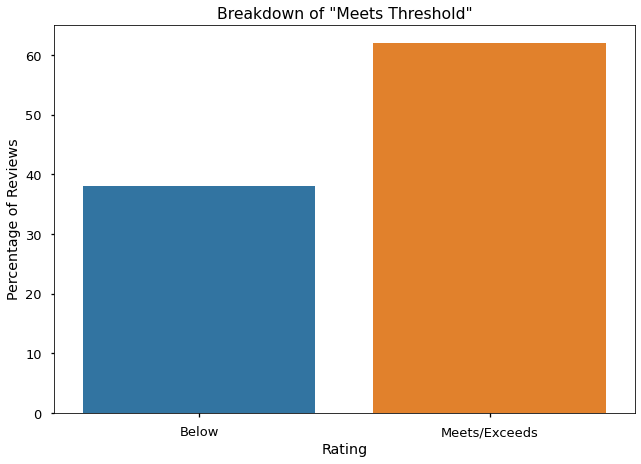

In [36]:
## Visualizing the overall distribution of ratings

ax = sns.barplot(data = df, x = threshold_counts.index, y = threshold_counts['Percent'])#, hue= df['meets_threshold'])

ax.set(title = 'Breakdown of "Meets Threshold"',
       xlabel = 'Rating', ylabel = 'Percentage of Reviews',
       xticklabels = ["Below", "Meets/Exceeds"]);

---

**Rating Distributions**

> After processing the missing values and formatting the data, the values are properly converted into 0/1 values with **62% of the reviews at or below the target threshold of 4.8.**
>
> This imbalance is very important for the later modeling process. ***I will need to address the imbalance to ensure the best model performance.***

---

## toConverting True/False Columns to Binary Values

In [37]:
## Creating list of true/false features to convert to 1/0, respectively

t_f_xf = []

for col in df.columns:
    if df[col].nunique() == 2 and df[col].dtype == 'O':
        print(col,":",df[col].unique())
        t_f_xf.append(col)
        
t_f_xf

host_is_superhost : ['f' 't']
host_has_profile_pic : ['t' 'f']
host_identity_verified : ['t' 'f']
has_availability : ['t' 'f']
instant_bookable : ['f' 't']


['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [38]:
tf_vc = pd.DataFrame()
for col in t_f_xf:
    tf_vc = pd.concat([tf_vc, df[col].value_counts(normalize = 1, dropna=0, sort=0)], axis=1)

tf_vc

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
t,0.33,1.00,0.82,0.98,0.37
f,0.67,0.00,0.18,0.02,0.63


In [39]:
## Converting t/f to 1/0, respectively

df.loc[:,t_f_xf] = df.loc[:,t_f_xf].replace({ 't' : 1, 'f' : 0})

In [40]:
## Verifying results
cf.report_df(df[t_f_xf])

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
host_is_superhost,0,0.00,int64,2,"5,816.00",0.33,0.47,0.00,0.00,0.00,1.00,1.00
host_has_profile_pic,0,0.00,int64,2,"5,816.00",1.00,0.03,0.00,1.00,1.00,1.00,1.00
host_identity_verified,0,0.00,int64,2,"5,816.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
has_availability,0,0.00,int64,2,"5,816.00",0.98,0.14,0.00,1.00,1.00,1.00,1.00
instant_bookable,0,0.00,int64,2,"5,816.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00


## Converting Price to Float 

In [41]:
df['price'][:5]

0    $55.00
1    $70.00
2    $54.00
3    $99.00
4    $86.00
Name: price, dtype: object

In [42]:
## Converting each value into a float for processing

df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')
df['price'][0]

55.0

In [43]:
df['price'].describe()

count    5,816.00
mean       149.96
std        225.75
min          0.00
25%         77.00
50%        108.00
75%        163.00
max     10,000.00
Name: price, dtype: float64

## Creating "Years_Hosting"

---

> Since the 'host_since' feature is clearly a date, I will create a separate feature for how many years of activity for each host.

---

In [44]:
df['years_hosting'] = df["host_since"].map(lambda x: 2021- int(x.split("-")[0]))
df['years_hosting']

0       13
1       13
2       13
3       12
4       12
        ..
5811     7
5812     9
5813    10
5814     2
5815     2
Name: years_hosting, Length: 5816, dtype: int64

In [45]:
df['years_hosting'].value_counts()

6     1226
5      961
7      803
8      641
4      492
9      379
3      351
2      292
10     227
0      142
1      138
11      79
12      66
13      19
Name: years_hosting, dtype: int64

In [46]:
df['years_hosting'].describe()

count   5,816.00
mean        5.89
std         2.45
min         0.00
25%         5.00
50%         6.00
75%         7.00
max        13.00
Name: years_hosting, dtype: float64

---

> I successfully created the new feature to represent how long each host is active (up to 2021). I will be curious to see the impact of the years of experience on the overall rating at the end of my modeling process.

---

## Bathrooms_Text to Num_Bathrooms

---

> In the raw data, the original "bathrooms" feature was empty and was dropped as part of processing missing data.
>
> **My goal is to convert the "bathrooms_text" feature into a new "num_bathrooms" feature to indicate the number of bathrooms at a host property.**
>
> I assume the number of bathrooms would have an impact on the rating . More bathrooms could mean more space/comfort for the guest, but could also cause an increase in price.


---

In [47]:
## Checking current values
df['bathrooms_text'].value_counts(dropna=False)

1 bath              3226
1 shared bath        482
2 baths              476
1 private bath       472
1.5 baths            327
2.5 baths            298
1.5 shared baths     137
3.5 baths            104
2 shared baths        89
3 baths               83
2.5 shared baths      32
4 baths               30
4.5 baths             20
3 shared baths         8
0 baths                6
NaN                    4
0 shared baths         4
5 baths                3
5.5 baths              3
5.5 shared baths       2
6 baths                2
11 shared baths        2
3.5 shared baths       2
6.5 baths              2
Shared half-bath       1
Half-bath              1
Name: bathrooms_text, dtype: int64

In [48]:
## Inspecting the rows in which there are null values
df[df['bathrooms_text'].isna()]

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,meets_threshold,years_hosting
20,253258,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,NaN,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,0,1,1,0,0,1,11
25,7086,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,0,3,0,3,0,1,12
26,7086,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,0,3,0,3,0,1,12
4782,288033145,2019-08-22,0,U Street Corridor,0.00,0.00,"['email', 'phone']",1,1,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.03,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""O...",0.00,1,365,1,1,365,365,1.00,365.00,1,0,0,0,0,33,19,7,0,3,0,0,2,0,2


In [49]:
## Filling null values with unique string ('Baths' not present otherwise)
## Unique string can be used later to check for any other zero baths

df['bathrooms_text'] = df['bathrooms_text'].fillna('0 Baths')
df['bathrooms_text'].value_counts(dropna=False)

1 bath              3226
1 shared bath        482
2 baths              476
1 private bath       472
1.5 baths            327
2.5 baths            298
1.5 shared baths     137
3.5 baths            104
2 shared baths        89
3 baths               83
2.5 shared baths      32
4 baths               30
4.5 baths             20
3 shared baths         8
0 baths                6
0 shared baths         4
0 Baths                4
5 baths                3
5.5 baths              3
6 baths                2
6.5 baths              2
5.5 shared baths       2
11 shared baths        2
3.5 shared baths       2
Half-bath              1
Shared half-bath       1
Name: bathrooms_text, dtype: int64

In [50]:
## Splitting each list into separate strings
df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])
df['num_bathrooms'].value_counts()

1            4180
2             565
1.5           464
2.5           330
3.5           106
3              91
4              30
4.5            20
0              14
5.5             5
5               3
6.5             2
11              2
6               2
Shared          1
Half-bath       1
Name: num_bathrooms, dtype: int64

---

> **I will replace these values with the numeric value .5 as they are half-baths.** This will allow me to convert the column datatype to a float and use the column more easily in my modeling.

---

In [51]:
## Replacing string values with .5 to represent half-bathrooms

replace = {'Half-bath': .5, 'Shared': .5}

df['num_bathrooms'] = df['num_bathrooms'].replace(replace).astype(float)

## Inspecting resulting values
print(df['num_bathrooms'].dtype)
df['num_bathrooms'].value_counts(dropna=False)

float64


1.00     4180
2.00      565
1.50      464
2.50      330
3.50      106
3.00       91
4.00       30
4.50       20
0.00       14
5.50        5
5.00        3
6.50        2
0.50        2
11.00       2
6.00        2
Name: num_bathrooms, dtype: int64

In [52]:
## Inspecting listings with more than 10 rooms
df[df['num_bathrooms'] >10]

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,meets_threshold,years_hosting,num_bathrooms
1271,56885621,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,6.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,1,31,13,13,91,91,13.00,91.00,1,0,0,0,0,7,1,0,1,3,0,1,2,1,5,11.00
5039,56885621,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,3.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,7,180,13,13,91,91,13.00,91.00,1,0,0,0,0,6,6,0,1,3,0,1,2,0,5,11.00


---

> After taking a look at the locations listed above on Google Maps (using their latitude/longitude), I feel like these three listings with more than 10 bathrooms are either duplicates or incorrect values (for 50 baths).
>
> Due to the questionable nature of these values, I will drop these rows to prevent these outliers from impacting my results.

---

In [53]:
## Inspecting rows where 'num_bathrooms' is zero to validate data

df[(df['num_bathrooms'] ==0)]

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,meets_threshold,years_hosting,num_bathrooms
20,253258,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,0 Baths,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,0,1,1,0,0,1,11,0.00
25,7086,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,0,3,0,3,0,1,12,0.00
26,7086,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,0,3,0,3,0,1,12,0.00
467,28827689,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Long term stays allowed"", ""Essentials"", ""Hea...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,159,0,0,0,8,0,8,0,0,6,0.00
468,28827689,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Long t...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,231,0,0,0,8,0,8,0,0,6,0.00
469,28827689,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,1,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",95.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,256,0,0,0,8,0,8,0,0,6,0.00
1095,40797092,2015-08-07,0,Petworth,3.00,3.00,"['email', 'phone', 'reviews', 'kba']",1,0,"Brightwood Park, Crestwood, Petworth",38.94,-77.02,Private room,1,0 shared baths,1.00,1.00,"[""Kitchen"", ""Carbon monoxide alarm"", ""Keypad"",...",65.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,30,60,90,365,43,0,0,0,3,0,3,0,1,6,0.00
1493,8731231,2013-09-09,1,NaN,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"North Cleveland Park, Forest Hills, Van Ness",38.94,-77.06,Private room,2,0 shared baths,nan,0.00,"[""Elevator"", ""Dedicated workspace"", ""Long term...",150.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,9,284,25,0,0,0,1,0,1,0,1,8,0.00
1853,49350907,2015-11-18,0,Shaw,3.00,3.00,"['email', 'phone', 'reviews', 'offline_governm...",1,1,"Shaw, Logan Circle",38.91,-77.02,Private room,2,0 baths,1.00,1.00,"[""Dedicated workspace"", ""Long term stays allow...",90.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,2,0,0,0,2,1,1,0,1,6,0.00
2710,1437612,2011-11-23,0,Anacostia,1.00,1.00,"['email', 'phone', 'facebook', 'reviews', 'wor...",1,0,Historic Anacostia,38.86,-76.98,Private room,1,0 shared baths,1.00,1.00,"[""Shampoo"", ""Hot water"", ""Security cameras on ...",50.00,2,420,2,2,420,420,2.00,420.00,1,0,0,0,0,6,0,0,0,1,0,1,0,1,10,0.00


In [54]:
## Removing old column post-conversion
df = df.drop(columns = 'bathrooms_text')

In [55]:
## Confirming removal

'bathrooms_text' in df.columns

False

---

> My review of the original bathroom text for the zero bathrooms column shows that the listings are associated with a private room. This would make sense as the listings may not include an option such as a shared bath, etc..
>
> Additionally I did fill 9 instances of missing values with "0 Baths," which would contribute slightly to this count.
>
> Overall, I feel the data is valid and I will use it for my modeling.

---

## Cleaning Room_Type

---

>  In order to use “room_type” as a categorical variable, I convert the values to standardized strings. This allows me to perform one-hot encoding as part of my pre-modeling steps below.

---

In [56]:
## Reviewing pre-existing values

df['room_type'].value_counts()

Entire home/apt    4311
Private room       1381
Shared room          98
Hotel room           26
Name: room_type, dtype: int64

In [57]:
## Replacing values with updated strings

replace_rooms = {'Entire home/apt': 'entire_home', 
                 'Private room': 'private_room',
                 'Shared room': 'shared_room',
                 'Hotel room': 'hotel_room'
                }

df['room_type'].replace(replace_rooms, inplace=True)
df['room_type'].value_counts(dropna=False)

entire_home     4311
private_room    1381
shared_room       98
hotel_room        26
Name: room_type, dtype: int64

## Binarizing Columns

---

> The current values for "neighbourhood_cleansed", 'host_verifications', and 'amenities' are  single string values. **For each feature, I will separate each string into distinct, unique values and convert them into a binary column to represent whether or not that value is included in the listing, then drop the old column.**

---

### Neighbourhood_Cleansed

In [58]:
## Inspecting feature
df.loc[:,'neighbourhood_cleansed'][:5]

0                                   Historic Anacostia
1    Edgewood, Bloomingdale, Truxton Circle, Eckington
2                         Eastland Gardens, Kenilworth
3       Ivy City, Arboretum, Trinidad, Carver Langston
4       Kalorama Heights, Adams Morgan, Lanier Heights
Name: neighbourhood_cleansed, dtype: object

In [59]:
df.loc[:,'neighbourhood_cleansed'][0]

'Historic Anacostia'

In [60]:
## Splitting string value between neighborhoods

unique_neighborhood = list(set(','.join(df['neighbourhood_cleansed']).split(',')))
unique_neighborhood

[' Petworth',
 ' Greenway',
 ' Hillbrook',
 'Edgewood',
 ' University Heights',
 'Takoma',
 'Capitol View',
 ' Kingman Park',
 'Cathedral Heights',
 ' Bellevue',
 ' Grant Park',
 'Cleveland Park',
 'North Cleveland Park',
 'Downtown',
 'Dupont Circle',
 ' Summit Park',
 ' Mount Vernon Square',
 ' Barry Farm',
 'Howard University',
 ' Michigan Park',
 ' Stanton Park',
 ' North Capitol Street',
 ' Park View',
 'Lamont Riggs',
 'Georgetown',
 ' Pleasant Plains',
 ' Knox Hill',
 ' Randle Highlands',
 ' Fairmont Heights',
 ' Le Droit Park',
 'Spring Valley',
 'Kalorama Heights',
 ' Marshall Heights',
 'Eastland Gardens',
 'Colonial Village',
 ' Fort Davis Park',
 'Mayfair',
 ' Georgetown Reservoir',
 'Congress Heights',
 ' Tenleytown',
 ' Langdon',
 ' Chinatown',
 ' Washington Highlands',
 ' Penn Quarters',
 ' Logan Circle',
 ' Wesley Heights',
 'Twining',
 ' Cardozo/Shaw',
 ' Bloomingdale',
 ' Benning',
 'Deanwood',
 'Brookland',
 ' Benning Heights',
 ' Fort Totten',
 ' Mt. Pleasant',
 ' F

In [61]:
## Cleaning names and creating T/F binary columns

for neighborhood in unique_neighborhood:
    
    neighborhood = neighborhood.replace("'", "")
    
    if neighborhood[0] == ' ':
        neighborhood = neighborhood[1:]
    
    df[neighborhood] = df['neighbourhood_cleansed'].str.contains(neighborhood).astype(int)

In [62]:
## Confirming results
df.columns[-20:]

Index(['Trinidad', 'Ivy City', 'Woodland-Normanstone Terrace', 'Fort Dupont',
       'Fort McNair', 'Brightwood Park', 'Shepherd Park', 'Friendship Heights',
       'Lincoln Heights', 'West End', 'Dupont Park', 'Fairfax Village',
       'Penn Branch', 'Woodley Park', 'Union Station', 'North Portal Estates',
       'Foxhall Village', 'Navy Yard', 'Gateway', 'Shipley Terrace'],
      dtype='object')

In [63]:
## Confirming removal of leading spaces and any quotes

df.columns[-20:][0][:3]

'Tri'

### Host_Verifications

In [64]:
## Inspecting values
df['host_verifications'][:5]

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1                 ['email', 'phone', 'reviews', 'kba']
2    ['email', 'phone', 'facebook', 'reviews', 'jum...
3                 ['email', 'phone', 'reviews', 'kba']
4    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, dtype: object

In [65]:
## Inspecting the first five items of the second row

df.loc[:,'host_verifications'][1][:5]

"['ema"

In [66]:
## Splitting string value between verifications

unique_verif = list(set(','.join(df['host_verifications']).split(',')))
unique_verif

["['phone'",
 " 'government_id'",
 " 'identity_manual'",
 " 'reviews'",
 "['phone']",
 " 'jumio'",
 " 'manual_online'",
 " 'kba']",
 " 'manual_offline']",
 " 'work_email']",
 " 'weibo'",
 " 'phone']",
 " 'google']",
 " 'sent_id']",
 " 'facebook']",
 " 'phone'",
 '[]',
 " 'reviews']",
 " 'manual_offline'",
 " 'offline_government_id']",
 " 'offline_government_id'",
 " 'sent_id'",
 " 'selfie'",
 "['email']",
 "['email'",
 " 'selfie']",
 " 'government_id']",
 " 'identity_manual']",
 " 'google'",
 " 'jumio']",
 "['reviews'",
 " 'facebook'",
 " 'kba'"]

In [67]:
## Cleaning names and creating T/F binary columns

for verification in unique_verif:
    
    if len(verification) > 2:
        
        verification = verification.replace('[', '').replace(']', '').\
        replace("'", '').replace('"', '')

    if verification[0] == ' ':
        verification = verification[1:]

        df[verification] = df['host_verifications'].str.\
                            contains(verification).astype(int)

In [68]:
df.columns

Index(['host_id', 'host_since', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed',
       ...
       'kba', 'manual_offline', 'work_email', 'weibo', 'phone', 'google',
       'sent_id', 'facebook', 'offline_government_id', 'selfie'],
      dtype='object', length=183)

---

> At this point, I successfully processed the 'host_verification' feature into distinct categories for modeling.

---

### Amenities


In [69]:
## Inspecting values
df['amenities'][:5]

0    ["First aid kit", "Long term stays allowed", "...
1    ["Cooking basics", "First aid kit", "Dedicated...
2    ["Cooking basics", "First aid kit", "Keypad", ...
3    ["Cable TV", "TV with standard cable", "Kitche...
4    ["Window guards", "Cooking basics", "First aid...
Name: amenities, dtype: object

In [70]:
## Inspecting the first five items of the second row

df.loc[:,'amenities'][1][:5]

'["Coo'

In [71]:
## Splitting string value between items

unique_amenities = list(set(','.join(df['amenities']).split(',')))
unique_amenities

[' "Baby monitor"',
 ' "BPA-free conditioner"',
 '["Cooking basics"',
 ' "Aussie conditioner"',
 ' "Shared pool"',
 ' "Method body soap"',
 ' "Children\\u2019s books and toys for ages 0-2 years old"',
 ' "Babysitter recommendations"',
 ' Kirkland conditioner"',
 ' "42\\" HDTV with premium cable',
 ' "Ceiling fan"',
 ' "HDTV with HBO Max',
 ' "Essentials"',
 ' "55\\" HDTV with Netflix"',
 ' "Wine glasses"]',
 ' "50\\" TV with Roku"',
 '["Smoke alarm"',
 '["Bed linens"',
 ' "GE stainless steel oven"',
 ' "Carbon monoxide alarm"',
 ' "1 starter size shampoo"',
 ' "Outdoor dining area"',
 ' "wirlpool stainless steel oven"',
 ' "45\\" HDTV with Amazon Prime Video',
 ' "professional euro brand stainless steel oven"',
 ' "Private sauna"',
 ' "Dedicated workspace: table"',
 ' "Shared gym in building"',
 ' "Kenmore oven"',
 ' "hot plate & toaster oven electric stove"',
 ' "Hot water"',
 ' Roku',
 ' "BBQ grill"',
 '["Wifi \\u2013 200 Mbps"',
 ' "No idea body soap"',
 ' table',
 ' "GE Profile ove

In [72]:
## Cleaning names and creating T/F binary columns

for amenity in unique_amenities:
           
    amenity = amenity.replace('[', '').replace(']', '').\
    replace("'", '').replace('"', '')

    if amenity[0] == ' ':
        amenity = amenity[1:]

        df[amenity] = df['amenities'].str.\
                            contains(amenity).astype(int)

C:\Users\bmcca\anaconda3\envs\test_intel_env\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [73]:
df.columns

Index(['host_id', 'host_since', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed',
       ...
       '37\ TV', '50\ HDTV', 'Trader Joes shampoo', 'A good one refrigerator',
       'Washer \u2013\u00a0In building', 'Cleaning before checkout',
       'Lather conditioner', 'portable cooktop induction stove',
       'Indoor fireplace', 'Beachfront'],
      dtype='object', length=838)

# 🔬 **Pre-Pipeline Review**

In [74]:
## Review remaining data
df.head(3)

,host_id,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,meets_threshold,years_hosting,num_bathrooms,Petworth,Greenway,Hillbrook,Edgewood,University Heights,Takoma,Capitol View,Kingman Park,Cathedral Heights,Bellevue,Grant Park,Cleveland Park,North Cleveland Park,Downtown,Dupont Circle,Summit Park,Mount Vernon Square,Barry Farm,Howard University,Michigan Park,Stanton Park,North Capitol Street,Park View,Lamont Riggs,Georgetown,Pleasant Plains,Knox Hill,Randle Highlands,Fairmont Heights,Le Droit Park,Spring Valley,Kalorama Heights,Marshall Heights,Eastland Gardens,Colonial Village,Fort Davis Park,Mayfair,Georgetown Reservoir,Congress Heights,Tenleytown,Langdon,Chinatown,Washington Highlands,Penn Quarters,Logan Circle,Wesley Heights,Twining,Cardozo/Shaw,Bloomingdale,Benning,Deanwood,Brookland,Benning Heights,Fort Totten,Mt. Pleasant,Foggy Bottom,Lanier Heights,American University Park,Capitol Hill,Hillcrest,Hawthorne,Lincoln Park,River Terrace,Brightwood,Douglas,Palisades,Chevy Chase,Truxton Circle,Burleith/Hillandale,Southwest/Waterfront,Brentwood,Forest Hills,Eckington,McLean Gardens,Shaw,Arboretum,Southwest Employment Area,Crestwood,Fairlawn,Fort Lincoln,Garfield Heights,Buena Vista,Buzzard Point,Glover Park,Foxhall Crescent,Van Ness,Adams Morgan,Columbia Heights,Woodridge,Sheridan,GWU,Barnaby Woods,Kenilworth,Queens Chapel,Woodland/Fort Stanton,Manor Park,Carver Langston,Connecticut Avenue/K Street,Pleasant Hill,Naylor Gardens,Historic Anacostia,Massachusetts Avenue Heights,Mahaning Heights,Burrville,North Michigan Park,Near Southeast,Trinidad,Ivy City,Woodland-Normanstone Terrace,Fort Dupont,Fort McNair,Brightwood Park,Shepherd Park,Friendship Heights,Lincoln Heights,West End,Dupont Park,Fairfax Village,Penn Branch,Woodley Park,Union Station,North Portal Estates,Foxhall Village,Navy Yard,Gateway,Shipley Terrace,government_id,identity_manual,reviews,jumio,manual_online,kba,manual_offline,work_email,weibo,phone,google,sent_id,facebook,offline_government_id,selfie,Baby monitor,BPA-free conditioner,Aussie conditioner,Shared pool,Method body soap,Children\u2019s books and toys for ages 0-2 years old,Babysitter recommendations,Kirkland conditioner,42\ HDTV with premium cable,Ceiling fan,HDTV with HBO Max,Essentials,55\ HDTV with Netflix,Wine glasses,50\ TV with Roku,GE stainless steel oven,Carbon monoxide alarm,1 starter size shampoo,Outdoor dining area,wirlpool stainless steel oven,45\ HDTV with Amazon Prime Video,professional euro brand stainless steel oven,Private sauna,Dedicated workspace: table,Shared gym in building,Kenmore oven,hot plate & toaster oven electric stove,Hot water,Roku,BBQ grill,No idea body soap,table,GE Profile oven,Wifi,main floor living room,Fire extinguisher,Portable fans,Bidet,Wifi \u2013 551 Mbps,conditioning shampoo conditioner,Wifi \u2013 50 Mbps,Kirkland shampoo,Board games,TV with standard cable,Google Nest sound system,and office chair,Dedicated workspace: table and desk,Aussie shampoo,TV with Apple TV,Paid parking on premises \u2013 1 space,Clothing storage: dresser and closet,Bread maker,Security cameras on property,HDTV with Apple TV,Toiletries,Dishwasher,Free washer,Wolf stainless steel gas stove,Clothing storage,Terra Pure- Organic & Natural body soap,32\ HDTV with Amazon Prime Video,Suave body soap,30\ HDTV,S

In [75]:
## Removing columns with no impact on modeling

df.drop(columns = ['host_since', 'host_neighbourhood', 'amenities'], inplace=True)

In [76]:
## Final review

df.describe()

,host_id,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,meets_threshold,years_hosting,num_bathrooms,Petworth,Greenway,Hillbrook,Edgewood,University Heights,Takoma,Capitol View,Kingman Park,Cathedral Heights,Bellevue,Grant Park,Cleveland Park,North Cleveland Park,Downtown,Dupont Circle,Summit Park,Mount Vernon Square,Barry Farm,Howard University,Michigan Park,Stanton Park,North Capitol Street,Park View,Lamont Riggs,Georgetown,Pleasant Plains,Knox Hill,Randle Highlands,Fairmont Heights,Le Droit Park,Spring Valley,Kalorama Heights,Marshall Heights,Eastland Gardens,Colonial Village,Fort Davis Park,Mayfair,Georgetown Reservoir,Congress Heights,Tenleytown,Langdon,Chinatown,Washington Highlands,Penn Quarters,Logan Circle,Wesley Heights,Twining,Cardozo/Shaw,Bloomingdale,Benning,Deanwood,Brookland,Benning Heights,Fort Totten,Mt. Pleasant,Foggy Bottom,Lanier Heights,American University Park,Capitol Hill,Hillcrest,Hawthorne,Lincoln Park,River Terrace,Brightwood,Douglas,Palisades,Chevy Chase,Truxton Circle,Burleith/Hillandale,Southwest/Waterfront,Brentwood,Forest Hills,Eckington,McLean Gardens,Shaw,Arboretum,Southwest Employment Area,Crestwood,Fairlawn,Fort Lincoln,Garfield Heights,Buena Vista,Buzzard Point,Glover Park,Foxhall Crescent,Van Ness,Adams Morgan,Columbia Heights,Woodridge,Sheridan,GWU,Barnaby Woods,Kenilworth,Queens Chapel,Woodland/Fort Stanton,Manor Park,Carver Langston,Connecticut Avenue/K Street,Pleasant Hill,Naylor Gardens,Historic Anacostia,Massachusetts Avenue Heights,Mahaning Heights,Burrville,North Michigan Park,Near Southeast,Trinidad,Ivy City,Woodland-Normanstone Terrace,Fort Dupont,Fort McNair,Brightwood Park,Shepherd Park,Friendship Heights,Lincoln Heights,West End,Dupont Park,Fairfax Village,Penn Branch,Woodley Park,Union Station,North Portal Estates,Foxhall Village,Navy Yard,Gateway,Shipley Terrace,government_id,identity_manual,reviews,jumio,manual_online,kba,manual_offline,work_email,weibo,phone,google,sent_id,facebook,offline_government_id,selfie,Baby monitor,BPA-free conditioner,Aussie conditioner,Shared pool,Method body soap,Children\u2019s books and toys for ages 0-2 years old,Babysitter recommendations,Kirkland conditioner,42\ HDTV with premium cable,Ceiling fan,HDTV with HBO Max,Essentials,55\ HDTV with Netflix,Wine glasses,50\ TV with Roku,GE stainless steel oven,Carbon monoxide alarm,1 starter size shampoo,Outdoor dining area,wirlpool stainless steel oven,45\ HDTV with Amazon Prime Video,professional euro brand stainless steel oven,Private sauna,Dedicated workspace: table,Shared gym in building,Kenmore oven,hot plate & toaster oven electric stove,Hot water,Roku,BBQ grill,No idea body soap,table,GE Profile oven,Wifi,main floor living room,Fire extinguisher,Portable fans,Bidet,Wifi \u2013 551 Mbps,conditioning shampoo conditioner,Wifi \u2013 50 Mbps,Kirkland shampoo,Board games,TV with standard cable,Google Nest sound system,and office chair,Dedicated workspace: table and desk,Aussie shampoo,TV with Apple TV,Paid parking on premises \u2013 1 space,Clothing storage: dresser and closet,Bread maker,Security cameras on property,HDTV with Apple TV,Toiletries,Dishwasher,Free washer,Wolf stainless steel gas stove,Clothing storage,Terra Pure- Organic & Natural body soap,32\ HDTV with Amazon Prime Video,Suave body soap,30\ HDTV,Single level home,Wifi \u2013 100 Mbps,Bed linens,Free parking on premises \u2013 1 space,Lat

# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.
>
> **Since my target feature is converted into binary values, I will use the "stratify" parameter in my train/test split, preserving the class balance when I split my data.** This will be key for proper evaluation of my models.

---

In [77]:
## Specifying features and target columns for dataset
target = 'meets_threshold'

X = df.drop(columns = target).copy()
y = df[target].copy()

In [78]:
## Confirming same number of rows
X.shape[0] == y.shape[0]

True

In [79]:
## Splitting to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, 
                                                    random_state=42, 
                                                    stratify=y)

# 🚿 **Preprocessing Pipeline**

---

>  Before I start my modeling processes, I convert my remaining categorical column via one-hot encoding and perform standardization on my numeric columns. Once my columns are properly converted, I will save them as new dataframes and use them in my modeling.

---

In [80]:
## Specifying numeric columns for preprocessing
num_cols = X_train.select_dtypes(include=[int, float]).columns.to_list()
# num_cols

In [81]:
## Specifying categorical columns for preprocessing
cat_cols = ['room_type']
cat_cols

['room_type']

In [82]:
## Checking missing X-values for imputation
X_train.isna().sum()[X_train.isna().sum() > 0]

bedrooms    53
beds         1
dtype: int64

## Runnning Preprocessor

In [83]:
## Creating ColumnTransformer and sub-transformers for imputation and encoding


### --- Creating column transformers --- ###

# Filling missing values in "Beds" and "Bedrooms"
miss_num_transformer = SimpleImputer(strategy='mean')

## Encoding categoricals - ignoring errors to prevent issues w/ test set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)


### --- Creating column pipelines --- ###

cat_pipe = Pipeline(steps=[('ohe', categorical_transformer)])

num_pipe = Pipeline(steps=[('imputer', miss_num_transformer),
                           ('scaler', StandardScaler())])

## Instantiating the ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[('nums', num_pipe, num_cols),
                  ('cats', cat_pipe, cat_cols)])

preprocessor

ColumnTransformer(transformers=[('nums',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['host_listings_count',
                                  'host_total_listings_count', 'latitude',
                                  'longitude', 'bedrooms', 'beds', 'price',
                                  'minimum_nights_avg_ntm',
                                  'maximum_nights_avg_ntm', 'num_bathrooms',
                                  'Petworth', 'Greenway', 'Hillbrook',
                                  'Edgewood', 'University Heights', 'Takoma',
                                  'Capitol View', 'Kingman Park',
                                  'Cathedral Heights', 'Bellevue', 'Grant Park',
                                  'Cleveland Park', 'North Cleveland Park',
                                  'Downtown', 'Dupont Circle', 'Summit Park',
                                  'Mount Vernon Square', 'Barry Farm',
                                  'Howard University', 'Michigan Park', ...]),
                                ('cats',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['room_type'])])

In [84]:
## Fitting feature preprocessor
preprocessor.fit(X_train)

## Getting feature names from OHE
ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

## Generating list for column index
final_cols = [*num_cols, *ohe_cat_names]

In [85]:
## Transform the data via the ColumnTransformer preprocessor

X_train_tf = preprocessor.transform(X_train)
X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

X_test_tf = preprocessor.transform(X_test)
X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

display(X_train_tf_df.head(5),X_test_tf_df.head(5))

,host_listings_count,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,num_bathrooms,Petworth,Greenway,Hillbrook,Edgewood,University Heights,Takoma,Capitol View,Kingman Park,Cathedral Heights,Bellevue,Grant Park,Cleveland Park,North Cleveland Park,Downtown,Dupont Circle,Summit Park,Mount Vernon Square,Barry Farm,Howard University,Michigan Park,Stanton Park,North Capitol Street,Park View,Lamont Riggs,Georgetown,Pleasant Plains,Knox Hill,Randle Highlands,Fairmont Heights,Le Droit Park,Spring Valley,Kalorama Heights,Marshall Heights,Eastland Gardens,Colonial Village,Fort Davis Park,Mayfair,Georgetown Reservoir,Congress Heights,Tenleytown,Langdon,Chinatown,Washington Highlands,Penn Quarters,Logan Circle,Wesley Heights,Twining,Cardozo/Shaw,Bloomingdale,Benning,Deanwood,Brookland,Benning Heights,Fort Totten,Mt. Pleasant,Foggy Bottom,Lanier Heights,American University Park,Capitol Hill,Hillcrest,Hawthorne,Lincoln Park,River Terrace,Brightwood,Douglas,Palisades,Chevy Chase,Truxton Circle,Burleith/Hillandale,Southwest/Waterfront,Brentwood,Forest Hills,Eckington,McLean Gardens,Shaw,Arboretum,Southwest Employment Area,Crestwood,Fairlawn,Fort Lincoln,Garfield Heights,Buena Vista,Buzzard Point,Glover Park,Foxhall Crescent,Van Ness,Adams Morgan,Columbia Heights,Woodridge,Sheridan,GWU,Barnaby Woods,Kenilworth,Queens Chapel,Woodland/Fort Stanton,Manor Park,Carver Langston,Connecticut Avenue/K Street,Pleasant Hill,Naylor Gardens,Historic Anacostia,Massachusetts Avenue Heights,Mahaning Heights,Burrville,North Michigan Park,Near Southeast,Trinidad,Ivy City,Woodland-Normanstone Terrace,Fort Dupont,Fort McNair,Brightwood Park,Shepherd Park,Friendship Heights,Lincoln Heights,West End,Dupont Park,Fairfax Village,Penn Branch,Woodley Park,Union Station,North Portal Estates,Foxhall Village,Navy Yard,Gateway,Shipley Terrace,government_id,identity_manual,reviews,jumio,manual_online,kba,manual_offline,work_email,weibo,phone,google,sent_id,facebook,offline_government_id,selfie,Baby monitor,BPA-free conditioner,Aussie conditioner,Shared pool,Method body soap,Children\u2019s books and toys for ages 0-2 years old,Babysitter recommendations,Kirkland conditioner,42\ HDTV with premium cable,Ceiling fan,HDTV with HBO Max,Essentials,55\ HDTV with Netflix,Wine glasses,50\ TV with Roku,GE stainless steel oven,Carbon monoxide alarm,1 starter size shampoo,Outdoor dining area,wirlpool stainless steel oven,45\ HDTV with Amazon Prime Video,professional euro brand stainless steel oven,Private sauna,Dedicated workspace: table,Shared gym in building,Kenmore oven,hot plate & toaster oven electric stove,Hot water,Roku,BBQ grill,No idea body soap,table,GE Profile oven,Wifi,main floor living room,Fire extinguisher,Portable fans,Bidet,Wifi \u2013 551 Mbps,conditioning shampoo conditioner,Wifi \u2013 50 Mbps,Kirkland shampoo,Board games,TV with standard cable,Google Nest sound system,and office chair,Dedicated workspace: table and desk,Aussie shampoo,TV with Apple TV,Paid parking on premises \u2013 1 space,Clothing storage: dresser and closet,Bread maker,Security cameras on property,HDTV with Apple TV,Toiletries,Dishwasher,Free washer,Wolf stainless steel gas stove,Clothing storage,Terra Pure- Organic & Natural body soap,32\ HDTV with Amazon Prime Video,Suave body soap,30\ HDTV,Single level home,Wifi \u2013 100 Mbps,Bed linens,Free parking on premises \u2013 1 space,Lather shampoo,Bergman Kelly body soap,Wifi \u2013 800 Mbps,Samsung sound system with Bluetooth and aux,Bergman Kelly conditioner,desk,Samsung Bluetooth sound system,Generic liquid body soap,48\ HDTV with Roku,44\ HDTV with standard cable,Shared outdoor pool,Frigidaire stainless steel gas stove,Wifi \u2013 600 Mbps,HBO Max,Table corner guards,46\ HDTV with Apple TV,Whirlpool stainless steel oven,40\ HDTV with Roku,Shared gym,Wifi \u2013 947 Mbps,Washer \u2013\u00a0In unit,Portable 2 burner cooktop (stored in cabinet) electric stove,65\ HDTV with Netflix,Cabl

,host_listings_count,host_total_listings_count,latitude,longitude,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,num_bathrooms,Petworth,Greenway,Hillbrook,Edgewood,University Heights,Takoma,Capitol View,Kingman Park,Cathedral Heights,Bellevue,Grant Park,Cleveland Park,North Cleveland Park,Downtown,Dupont Circle,Summit Park,Mount Vernon Square,Barry Farm,Howard University,Michigan Park,Stanton Park,North Capitol Street,Park View,Lamont Riggs,Georgetown,Pleasant Plains,Knox Hill,Randle Highlands,Fairmont Heights,Le Droit Park,Spring Valley,Kalorama Heights,Marshall Heights,Eastland Gardens,Colonial Village,Fort Davis Park,Mayfair,Georgetown Reservoir,Congress Heights,Tenleytown,Langdon,Chinatown,Washington Highlands,Penn Quarters,Logan Circle,Wesley Heights,Twining,Cardozo/Shaw,Bloomingdale,Benning,Deanwood,Brookland,Benning Heights,Fort Totten,Mt. Pleasant,Foggy Bottom,Lanier Heights,American University Park,Capitol Hill,Hillcrest,Hawthorne,Lincoln Park,River Terrace,Brightwood,Douglas,Palisades,Chevy Chase,Truxton Circle,Burleith/Hillandale,Southwest/Waterfront,Brentwood,Forest Hills,Eckington,McLean Gardens,Shaw,Arboretum,Southwest Employment Area,Crestwood,Fairlawn,Fort Lincoln,Garfield Heights,Buena Vista,Buzzard Point,Glover Park,Foxhall Crescent,Van Ness,Adams Morgan,Columbia Heights,Woodridge,Sheridan,GWU,Barnaby Woods,Kenilworth,Queens Chapel,Woodland/Fort Stanton,Manor Park,Carver Langston,Connecticut Avenue/K Street,Pleasant Hill,Naylor Gardens,Historic Anacostia,Massachusetts Avenue Heights,Mahaning Heights,Burrville,North Michigan Park,Near Southeast,Trinidad,Ivy City,Woodland-Normanstone Terrace,Fort Dupont,Fort McNair,Brightwood Park,Shepherd Park,Friendship Heights,Lincoln Heights,West End,Dupont Park,Fairfax Village,Penn Branch,Woodley Park,Union Station,North Portal Estates,Foxhall Village,Navy Yard,Gateway,Shipley Terrace,government_id,identity_manual,reviews,jumio,manual_online,kba,manual_offline,work_email,weibo,phone,google,sent_id,facebook,offline_government_id,selfie,Baby monitor,BPA-free conditioner,Aussie conditioner,Shared pool,Method body soap,Children\u2019s books and toys for ages 0-2 years old,Babysitter recommendations,Kirkland conditioner,42\ HDTV with premium cable,Ceiling fan,HDTV with HBO Max,Essentials,55\ HDTV with Netflix,Wine glasses,50\ TV with Roku,GE stainless steel oven,Carbon monoxide alarm,1 starter size shampoo,Outdoor dining area,wirlpool stainless steel oven,45\ HDTV with Amazon Prime Video,professional euro brand stainless steel oven,Private sauna,Dedicated workspace: table,Shared gym in building,Kenmore oven,hot plate & toaster oven electric stove,Hot water,Roku,BBQ grill,No idea body soap,table,GE Profile oven,Wifi,main floor living room,Fire extinguisher,Portable fans,Bidet,Wifi \u2013 551 Mbps,conditioning shampoo conditioner,Wifi \u2013 50 Mbps,Kirkland shampoo,Board games,TV with standard cable,Google Nest sound system,and office chair,Dedicated workspace: table and desk,Aussie shampoo,TV with Apple TV,Paid parking on premises \u2013 1 space,Clothing storage: dresser and closet,Bread maker,Security cameras on property,HDTV with Apple TV,Toiletries,Dishwasher,Free washer,Wolf stainless steel gas stove,Clothing storage,Terra Pure- Organic & Natural body soap,32\ HDTV with Amazon Prime Video,Suave body soap,30\ HDTV,Single level home,Wifi \u2013 100 Mbps,Bed linens,Free parking on premises \u2013 1 space,Lather shampoo,Bergman Kelly body soap,Wifi \u2013 800 Mbps,Samsung sound system with Bluetooth and aux,Bergman Kelly conditioner,desk,Samsung Bluetooth sound system,Generic liquid body soap,48\ HDTV with Roku,44\ HDTV with standard cable,Shared outdoor pool,Frigidaire stainless steel gas stove,Wifi \u2013 600 Mbps,HBO Max,Table corner guards,46\ HDTV with Apple TV,Whirlpool stainless steel oven,40\ HDTV with Roku,Shared gym,Wifi \u2013 947 Mbps,Washer \u2013\u00a0In unit,Portable 2 burner cooktop (stored in cabinet) electric stove,65\ HDTV with Netflix,Cabl

# 📊 **Baseline Model**


|-------------------------------- Classification Metrics -----------------------------------|

Training accuracy score: 0.53
Testing accuracy score: 0.53
	- The scores are the same size.


Training data Log Loss: 16.31
Testing data log loss: 16.27



|---------------------------- Classification Report - Testing Data -------------------------|

              precision    recall  f1-score   support

           0       0.38      0.39      0.38       664
           1       0.62      0.62      0.62      1081

    accuracy                           0.53      1745
   macro avg       0.50      0.50      0.50      1745
weighted avg       0.53      0.53      0.53      1745



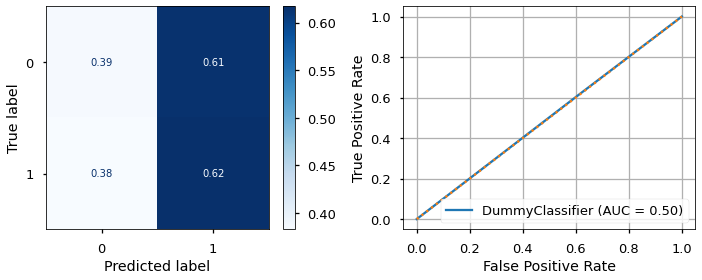


|---------------------------- Classification Report - Training Data ------------------------|

              precision    recall  f1-score   support

           0       0.38      0.38      0.38      1548
           1       0.62      0.62      0.62      2523

    accuracy                           0.53      4071
   macro avg       0.50      0.50      0.50      4071
weighted avg       0.53      0.53      0.53      4071



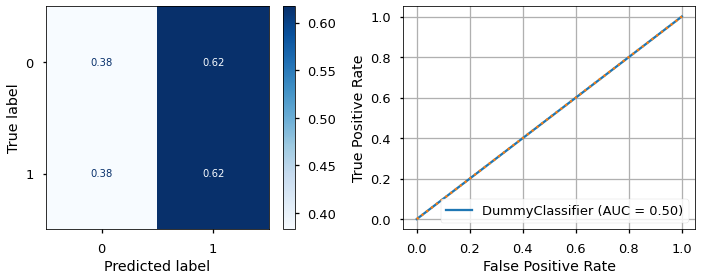

In [86]:
## Creating baseline classifier model

base = DummyClassifier(strategy='stratified', random_state = 42)

base.fit(X_train_tf_df, y_train)

cf.evaluate_classification(base,X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test, 
                           metric = 'accuracy')

In [87]:
## Saving the baseline scores for later comparisons

base_train_score, base_test_score, base_train_ll, base_test_ll = \
cf.model_scores(base, X_train_tf_df, y_train, X_test_tf_df, y_test)

base_train_score, base_test_score, base_train_ll, base_test_ll

(0.53, 0.53, 16.31, 16.27)

---

**Interpretation**

> The baseline model is designed to be a poor-performer: the results are intended to be be close to .5 for most metrics, indicating the model is not performing better than simply guessing one result or the other.
>
> I use this model as a comparison point to judge the performance of my other models.

---

#  📊 **Logistic Regression Model**

C:\Users\bmcca\anaconda3\envs\test_intel_env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



|-------------------------------- Classification Metrics -----------------------------------|

Training accuracy score: 0.68
Testing accuracy score: 0.59
	- The training score is larger by 0.09 points.


Training data Log Loss: 0.58
Testing data log loss: 0.71



|---------------------------- Classification Report - Testing Data -------------------------|

              precision    recall  f1-score   support

           0       0.47      0.58      0.52       664
           1       0.70      0.60      0.65      1081

    accuracy                           0.59      1745
   macro avg       0.59      0.59      0.58      1745
weighted avg       0.61      0.59      0.60      1745



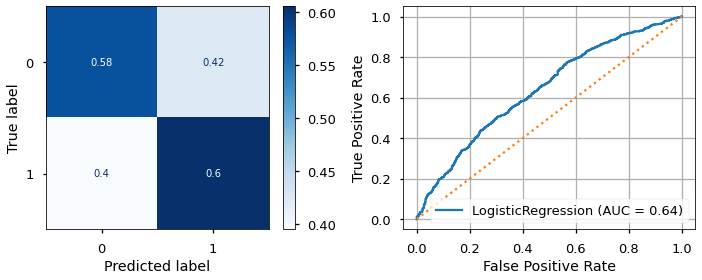


|---------------------------- Classification Report - Training Data ------------------------|

              precision    recall  f1-score   support

           0       0.57      0.69      0.62      1548
           1       0.78      0.68      0.73      2523

    accuracy                           0.68      4071
   macro avg       0.67      0.68      0.67      4071
weighted avg       0.70      0.68      0.69      4071



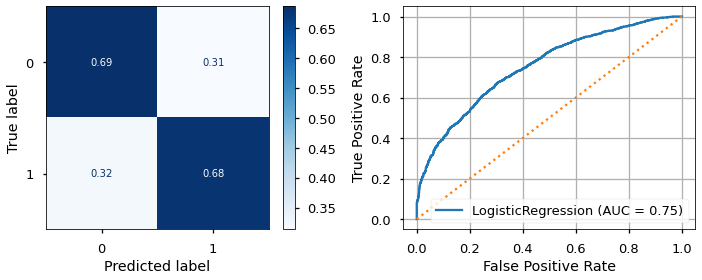

In [88]:
clf = LogisticRegression(tol = 1e-3, C = 10, penalty = "l1", solver = 'saga', 
                         max_iter=500, class_weight='balanced', n_jobs=-1,
                         random_state = 42)

clf.fit(X_train_tf_df, y_train)

cf.evaluate_classification(clf, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

---

**Interpretation**

> The simple LogReg model shows a slight performance increase - the log-loss decreased, the accuracy incrased, and my macro recall score also increased.
>
> This model mis-predicts values about 64% of the time, most likely due to the class imbalances.

---

# 📊 **RandomForestClassifier**

In [89]:
rfc = RandomForestClassifier(bootstrap = False,max_features= 'sqrt', class_weight = 'balanced',
                            n_jobs=-1, max_depth = 15, min_samples_leaf = 3,
                            min_samples_split = 4, random_state=42)

In [90]:
rfc.fit(X_train_tf_df, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=15,
                       max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=4, n_jobs=-1, random_state=42)


|-------------------------------- Classification Metrics -----------------------------------|

Training accuracy score: 0.9
Testing accuracy score: 0.67
	- The training score is larger by 0.23 points.


Training data Log Loss: 0.49
Testing data log loss: 0.63



|---------------------------- Classification Report - Testing Data -------------------------|

              precision    recall  f1-score   support

           0       0.57      0.55      0.56       664
           1       0.73      0.74      0.74      1081

    accuracy                           0.67      1745
   macro avg       0.65      0.65      0.65      1745
weighted avg       0.67      0.67      0.67      1745



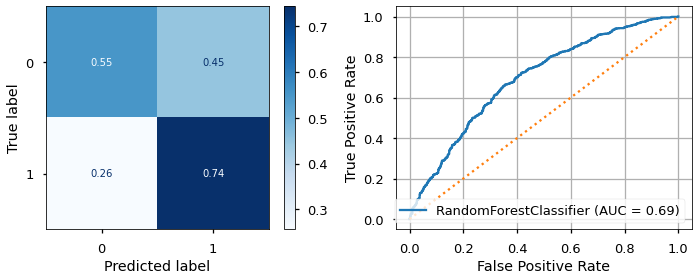


|---------------------------- Classification Report - Training Data ------------------------|

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1548
           1       0.94      0.90      0.92      2523

    accuracy                           0.90      4071
   macro avg       0.89      0.90      0.90      4071
weighted avg       0.90      0.90      0.90      4071



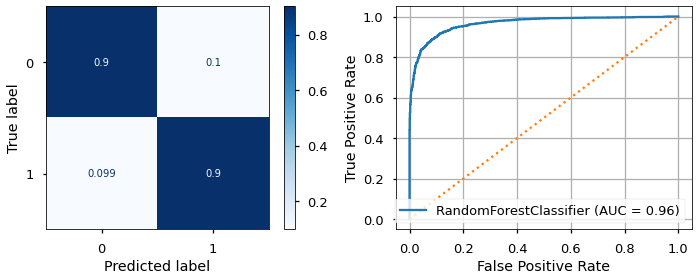

In [91]:
cf.evaluate_classification(rfc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'accuracy')

## Results

---

 **Comparing with Logistic Regression Model**
>
> The Random Forest classification model shows a higher degree of over-fitting; this is to be expected for tree-style models.
>
> This model shows slight performance increases as well. The log-loss decreased slightly as well, and the main two metrics of macro recall and accuracy both increased slightly.
>
> I will use this model as my best-performing model and will use its feature importances for my recommendations.

---

## Visualizing Feature Importances

---

> Now that I have the feature importances from my model, I interpret the results via visualizing the most important features and the target feature.

---

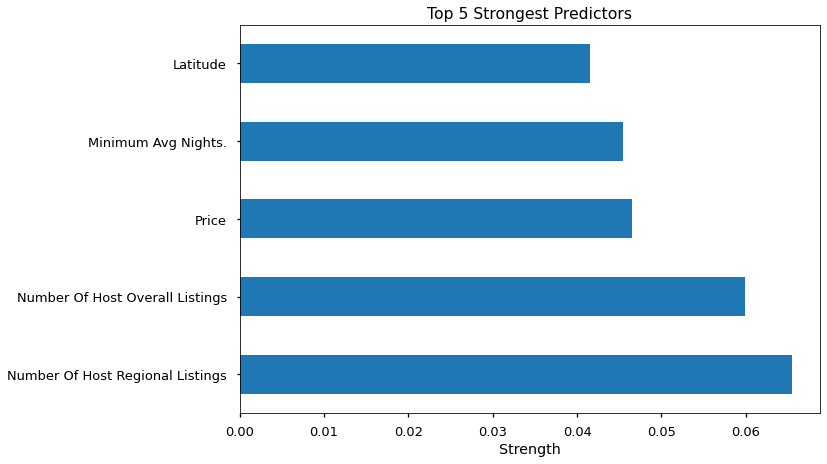

In [92]:
cf.plot_importances(rfc, X_test_tf_df, count=5)

---

**Interpreting Results**

> My resulting feature importances show that **the strongest predictor of scores 4.8+ would be whether or not a host is a SuperHost.** This makes sense, as one of the requirements for a host to be a SuperHost is to maintain a 4.8+ score, in addition to other requirements.
>
> Following SuperHost status are the number of listings for a host. **If a host has a large number of properties, they would most likely be an established businessperson and would be committed to hospitality, versus someone just renting out a spare room.**

---

# 💡 **Final Recommendations**


---

> **Based on the results of my models, I would recommend for Airbnb to prioritize promoting hosts to SuperHost status.**  SuperHost status is the strongest predictor for the desired high scores, and it is realistic for Airbnb to invest in their development and support. The second- and third-strongest predictors are much more difficult (and unrealistic) for Airbnb and hosts to improve.
>
> For further development, I would do the following:
>* **Include details from text reviews:** while the traditional survey questions are respected and informative, text-based reviews take precedence. In my experience in hotel operations, I would often get much more information from the written reviews, including nuances and specifics that the yes/no or 1-5 ratings miss.
>* **Include other regions:** My current dataset focused only on the Washington, D.C. area. Due to different regional factors (social/economic demographics; legal restrictions; etc.), other markets may show other features to be more important than my results. Additionally, I would like to explore international data to compare with the domestic data.

--- 

# **Testing Models - Poorer Performances**

---

> The models below showed poorer performance versus my Logistic Regression and my Random Forest models. I include them for reference and example.

---

## AdaBoostClassifier

In [93]:
# abc = AdaBoostClassifier(n_estimators=100, random_state=42)

In [94]:
# abc.fit(X_train_tf_df, y_train)

# cf.evaluate_classification(abc, X_train = X_train_tf_df, y_train = y_train,
#                            X_test = X_test_tf_df, y_test = y_test,
#                           metric = 'accuracy')

## Gradient Boosting

In [95]:
# gbc = GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [96]:
# gbc.fit(X_train_tf_df, y_train)

# cf.evaluate_classification(gbc, X_train = X_train_tf_df, y_train = y_train,
#                            X_test = X_test_tf_df, y_test = y_test,
#                           metric = 'accuracy')

## GridSearchCV: LogisticRegression

In [97]:
# import warnings
# warnings.filterwarnings('ignore')

In [98]:
# lr_params = {
#  'C': [.001, .01, .1, 1, 10, 100, 1000],
#     'penalty':['l1', 'l2', 'elasticnet', 'none'],
#     'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter':[100, 200, 300, 400]}

In [99]:
# gscv = GridSearchCV(LogisticRegression(class_weight='balanced'), lr_params, scoring = 'balanced_accuracy', cv=3,
#                     n_jobs = -1)
# gscv

In [100]:
# gscv.fit(X_train_tf_df, y_train)

In [101]:
# logreg_params = gscv.best_params_

# logreg_params

In [102]:
# gscv.best_estimator_

In [103]:
# cf.evaluate_classification(gscv.best_estimator_, X_train = X_train_tf_df, y_train = y_train,
#                            X_test = X_test_tf_df, y_test = y_test,
#                           metric = 'balanced accuracy')

## GSCV: RandomForestClassifier

In [104]:
# rfc_params = {
#     'n_estimators':[100, 125, 150,],
#     'max_depth': [10,20,30,40],
#     'min_samples_split': [2,3,4],
#     'min_samples_leaf': [1,2,3]
# }

In [105]:
# rfc = RandomForestClassifier(class_weight = 'balanced',
#                             n_jobs=-1, random_state=42)

In [106]:
# rfgs = GridSearchCV(rfc, rfc_params, scoring = 'balanced_accuracy', cv=3,
#                     n_jobs = -1)
# rfgs

In [107]:
# rfgs.fit(X_train_tf_df, y_train)

In [108]:
# rfc_params = rfgs.best_params_

# rfc_params

In [109]:
# rfgs.best_score_

In [110]:
# rfc_new = rfgs.best_estimator_

In [111]:
# cf.evaluate_classification(rfc_new, X_train_tf_df, y_train, X_test_tf_df, 
#                            y_test, 'recall (macro)')

## GSCV: AdaBoost

In [112]:
# abc_params = {'n_estimators': [10,20, 30],
# 'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# abc = AdaBoostClassifier(DecisionTreeClassifier(),random_state=42)

# abgs = GridSearchCV(estimator=abc, param_grid=abc_params, n_jobs=-1,
#                            cv=3, scoring='balanced_accuracy', verbose=2)


In [113]:
# abgs.fit(X_train_tf_df, y_train)

In [114]:
# abc_best_params = abgs.best_params_

# abc_best_params

In [115]:
# abgs.best_score_

In [116]:
# abc_new = abgs.best_estimator_

In [117]:
# cf.evaluate_classification(abc_new, X_train_tf_df, y_train, X_test_tf_df, 
#                            y_test, 'recall (macro)')

## XGBoost

In [118]:
# from xgboost import XGBClassifier

In [119]:
# xbgc = XGBClassifier()

In [120]:
# xbgc.fit(X = X_train_tf_df, y=y_train)

In [121]:
# xbgc.predict(X_test_tf_df)

In [122]:
# cf.evaluate_classification(xbgc,X_train_tf_df, y_train, X_test_tf_df, y_test, metric= 'accuracy')

In [123]:
# xgbc_names = xbgc.get_booster().feature_names
# # xgbc_names

In [124]:
# xgbc_importances = xbgc.feature_importances_
# # xgbc_importances

In [125]:
# xgbc_results = pd.Series(data = xgbc_importances, index = xgbc_names)
# xgbc_results

In [126]:
# xgbc_results.sort_values(ascending = False)